### MPS on Bars and Stripes dataset

In [1]:
#################
#### IMPORTS ####
#################

# Arrays
import numpy as np
import cytoolz

# Deep Learning stuff
import torch
import torchvision
import torchvision.transforms as transforms

# Images display and plots
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl

# Fancy progress bars
import tqdm.notebook as tq

# Tensor Network Stuff
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn # Tensor Network library
import quimb

import collections
import opt_einsum as oe
import itertools
import copy


In [2]:
import sys, os
sys.path.insert(0, '../')
# My functions
from TNutils import *


In [3]:
images = np.array(bars_n_stripes(30))


<Figure size 432x288 with 0 Axes>

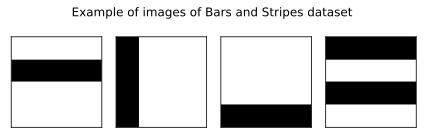

In [38]:
plt.figure()
f, axarr = plt.subplots(1,4) 
for i,img in enumerate(images[:4]):
    axarr[i].imshow(img, cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
f.suptitle('Example of images of Bars and Stripes dataset')
f.tight_layout()
f.subplots_adjust(top=1.4)
plt.show()


In [40]:
# Learning on the MPS requires flatten images
if len(images.shape) == 3: # if not flatten
    images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    
print('Shape of training set: {}'.format(images.shape))


Shape of training set: (30, 16)


In [47]:
bars_mps = initialize_mps(4*4,16)


In [48]:
#########################
# CHACHE INITIALIZATION #
#########################

# Creating list of tensor of the images of the training set
_imgs = np.array([tens_picture(img) for img in images])

_img_cache = []
for _img in _imgs:
    _left_cache = np.array([qtn.Tensor() for _ in range(len(_img))])
    _right_cache = np.array([qtn.Tensor() for _ in range(len(_img))])
    _img_cache.append((_left_cache,_right_cache))
_img_cache = np.array(_img_cache)

last_dirs = np.zeros(len(_img_cache),dtype =np.int32)
last_sites = np.zeros(len(_img_cache),dtype =np.int32)
last_epochs = -np.ones(len(_img_cache),dtype =np.int32)


In [49]:
############
# TRAINING #
############
nlls = cached_stochastic_learning_epoch(bars_mps, images, _imgs, 10, 0.08,
                                        _img_cache, last_dirs, last_sites, last_epochs,
                                        batch_size = 100)


epoch 1/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 5.276311072821316 | Baseline: 3.4011973816621555
epoch 2/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 4.500894660531478 | Baseline: 3.4011973816621555
epoch 3/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 4.133314024001209 | Baseline: 3.4011973816621555
epoch 4/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.9192429558337234 | Baseline: 3.4011973816621555
epoch 5/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.7735115729341215 | Baseline: 3.4011973816621555
epoch 6/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.685259964556206 | Baseline: 3.4011973816621555
epoch 7/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.623055446232212 | Baseline: 3.4011973816621555
epoch 8/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.575611582664157 | Baseline: 3.4011973816621555
epoch 9/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.541601591469621 | Baseline: 3.4011973816621555
epoch 10/10


  0%|          | 0/30 [00:00<?, ?it/s]

NLL: 3.51445954290855 | Baseline: 3.4011973816621555


<Figure size 432x288 with 0 Axes>

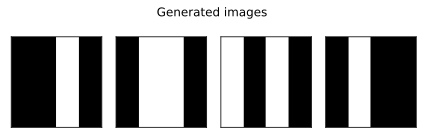

In [53]:
##############
# GENERATION #
##############

plt.figure()
f, axarr = plt.subplots(1,4) 
for i,img in enumerate(images[:4]):
    axarr[i].imshow(np.array(generate_sample(bars_mps)).reshape(4,4), cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
f.suptitle('Generated images')
f.tight_layout()
f.subplots_adjust(top=1.4)
plt.show()
